<a href="https://colab.research.google.com/github/jsansao/idl/blob/main/Licao5_ClassificacaoPerceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lição 5 - Perceptron - Conjuntos linearmente separáveis 

Nesta lição, vamos ver a aplicação das redes neurais de uma camada em um problema linearmente separável.  

Temos duas classes, com coordenadas bi-dimensionais. 


## Carregando as bibliotecas

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

## Lendo os dados em csv

In [6]:
from sklearn.datasets import make_blobs

data, label = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=0)


## A dispersão dos dados (treinamento e teste)



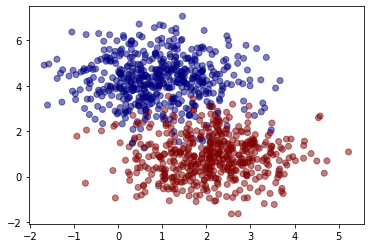

In [7]:
plt.scatter(data[:,0], data[:,1], c=label , alpha=0.5, cmap='jet')
plt.show()

In [8]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(data, label, random_state=0)

## Primeira tentativa: Rede neural com apenas um neurônio

In [9]:
model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[2])])
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=50)

model.summary()

Epoch 1/50
24/24 [==============================] - 0s 1ms/step - loss: 3.5099 - accuracy: 0.6427
Epoch 2/50
24/24 [==============================] - 0s 1ms/step - loss: 0.2726 - accuracy: 0.7373
Epoch 3/50
24/24 [==============================] - 0s 1ms/step - loss: 0.2454 - accuracy: 0.7333
Epoch 4/50
24/24 [==============================] - 0s 1ms/step - loss: 0.2244 - accuracy: 0.7480
Epoch 5/50
24/24 [==============================] - 0s 921us/step - loss: 0.2053 - accuracy: 0.7640
Epoch 6/50
24/24 [==============================] - 0s 949us/step - loss: 0.1898 - accuracy: 0.7707
Epoch 7/50
24/24 [==============================] - 0s 1ms/step - loss: 0.1746 - accuracy: 0.7853
Epoch 8/50
24/24 [==============================] - 0s 1ms/step - loss: 0.1610 - accuracy: 0.8027
Epoch 9/50
24/24 [==============================] - 0s 1ms/step - loss: 0.1496 - accuracy: 0.8173
Epoch 10/50
24/24 [==============================] - 0s 1ms/step - loss: 0.1397 - accuracy: 0.8320
Epoch 11/50
24/

## Dispersão da predição para o conjunto de teste

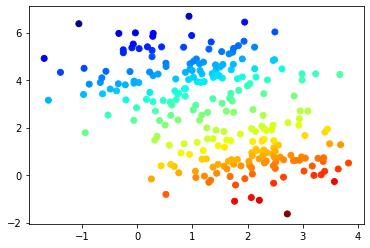

In [10]:
y_predict = model.predict(X_test)

plt.scatter(X_test[:,0], X_test[:,1], c=y_predict , cmap='jet')
plt.show()

## Superfície gerada pela rede (predição)

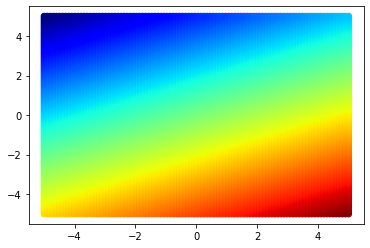

In [11]:
nx = 100
ny = 100
x = np.linspace(-5, 5, nx)
y = np.linspace(-5, 5, ny)
xv,yv = np.meshgrid(x, y, sparse=False, indexing='ij')
test_grid_x =  xv.flatten()
test_grid_y =  yv.flatten()

grid_list = np.append(test_grid_x, test_grid_y, axis=0)

test_grid = np.reshape(grid_list, (2, -1))

test_predict4 = model.predict(test_grid.T)

plt.scatter(test_grid[0,:], test_grid[1,:], c=test_predict4, cmap='jet')
plt.show()

## Acurácia de validação

In [14]:
model2 = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[2])])
model2.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])

history = model2.fit(X_train, y_train,
                    batch_size=20,
                    epochs=40,
                    verbose=1,
                    validation_data=(X_test, y_test))

model2.summary()

Epoch 1/40
38/38 [==============================] - 0s 4ms/step - loss: 1.6410 - accuracy: 0.4733 - val_loss: 0.1400 - val_accuracy: 0.8560
Epoch 2/40
38/38 [==============================] - 0s 2ms/step - loss: 0.0916 - accuracy: 0.9120 - val_loss: 0.0853 - val_accuracy: 0.9400
Epoch 3/40
38/38 [==============================] - 0s 2ms/step - loss: 0.0740 - accuracy: 0.9360 - val_loss: 0.0815 - val_accuracy: 0.9200
Epoch 4/40
38/38 [==============================] - 0s 2ms/step - loss: 0.0704 - accuracy: 0.9480 - val_loss: 0.0785 - val_accuracy: 0.9320
Epoch 5/40
38/38 [==============================] - 0s 2ms/step - loss: 0.0685 - accuracy: 0.9427 - val_loss: 0.0763 - val_accuracy: 0.9280
Epoch 6/40
38/38 [==============================] - 0s 2ms/step - loss: 0.0663 - accuracy: 0.9507 - val_loss: 0.0741 - val_accuracy: 0.9320
Epoch 7/40
38/38 [==============================] - 0s 2ms/step - loss: 0.0646 - accuracy: 0.9520 - val_loss: 0.0732 - val_accuracy: 0.9360
Epoch 8/40
38/38 [==

## Evolução do treinamento

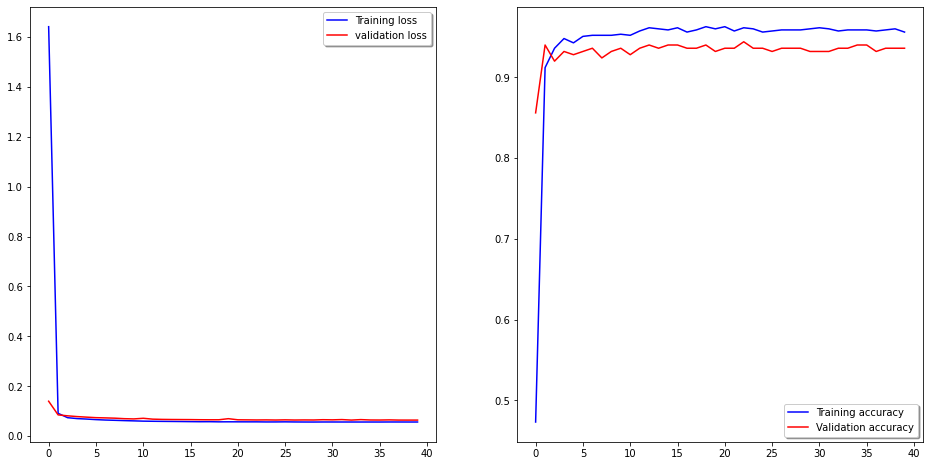

In [15]:
fig, ax = plt.subplots(1,2, figsize=(16,8))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

